In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#install ta-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2020-11-07 14:28:46--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-11-07 14:28:46--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-11-07 14:28:46--  https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newcon

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn==0.10.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,299 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (T

In [ ]:
!pip install PipelineProfiler

     |████████████████████████████████| 880kB 2.9MB/s 


In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 163kB 4.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=4970b20bf44c6859fd3fdfb6b0a295b0cb44fe77eeb2e2bf8c90d9284bb89ff0
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
!pip install h2o

     |████████████████████████████████| 129.4MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=fe74c575e63979ac4d50fca1f6769380c349ef74b4bb551c8e423f6ea47a09e1
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [ ]:
import datetime as dt
import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
import talib

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
def obtain_prices_df(csv_filepath, end_date):
    """
    Obtain the prices DataFrame from the CSV file,
    filter by the end date and calculate the 
    percentage returns.
    """
    df = pd.read_csv(
        csv_filepath, header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Adj Close", "Volume"
        ],
        index_col="Date", parse_dates=True
    )
    df["Returns"] = df["Adj Close"].pct_change()
    df = df[:end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df

def adj_ohlcv(hist_ohlcv):
  # Use adjusted close to work out intraday prices, change volume to $ turnover
  adj_px = hist_ohlcv['Adj Close'] - hist_ohlcv['Close']
  adj_ohlcv = hist_ohlcv[['Open','High','Low','Close']].add(adj_px,axis=0)
  adj_ohlcv['Volume'] = hist_ohlcv['Close'] * hist_ohlcv['Volume']
  return adj_ohlcv

In [ ]:
csv_filepath = "https://raw.githubusercontent.com/jackylshi/TrendStudyML/main/data/SPY2.csv"
end_date = dt.datetime.today()
hist_ohlcv = obtain_prices_df(csv_filepath, end_date)
daily_candle = adj_ohlcv(hist_ohlcv)

In [ ]:
daily_candle

,Open,High,Low,Close,Volume
Date,,,,,
2005-01-11,86.707054,86.807053,86.057053,86.247055,7.457123e+09
2005-01-12,86.361695,86.801689,85.481690,86.531693,8.622470e+09
2005-01-13,86.858398,86.948402,85.718399,85.838402,6.532321e+09
2005-01-14,86.020828,86.580826,85.810829,86.290825,4.969923e+09
2005-01-18,85.768486,87.338486,85.668480,87.188484,6.856586e+09
...,...,...,...,...,...
2020-10-05,336.059998,339.959991,336.010010,339.760010,1.553148e+10
2020-10-06,339.910004,342.170013,334.380005,334.929993,3.018687e+10
2020-10-07,338.119995,341.630005,338.089996,340.760010,1.942318e+10


In [ ]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance
def calcLevels(df):
  support_levels = []
  resist_levels = []
  for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
      support_levels.append((df.index[i],df['Low'][i]))
    elif isResistance(df,i):
      resist_levels.append((df.index[i],df['High'][i]))
  supports_df = pd.DataFrame(support_levels,columns=['date','support']).set_index('date')
  resists_df = pd.DataFrame(resist_levels,columns=['date','resist']).set_index('date')
  return supports_df.join(resists_df,how='outer')

In [ ]:
calcLevels(daily_candle)

,support,resist
date,,
2005-01-19,NaN,87.576272
2005-01-24,84.877533,NaN
2005-01-28,84.879716,NaN
2005-02-11,86.827247,NaN
2005-02-23,86.343903,NaN
...,...,...
2020-08-12,NaN,336.934632
2020-09-02,NaN,357.323853
2020-09-11,329.668090,NaN


In [ ]:
# Function to extract distance to level features
def extractDist(daily_candle, study_date, n_levels):
  candle_levels = daily_candle.join(calcLevels(daily_candle))
  support_levels = candle_levels[['support']].dropna().copy()
  resist_levels = candle_levels[['resist']].dropna().copy()

  study_period = daily_candle[daily_candle.index < study_date].copy()
  study_supports = support_levels[support_levels.index < study_date].copy()
  study_resists = resist_levels[resist_levels.index < study_date].copy()

  support_scores = []
  for i in range(len(study_supports)):
    test_level = study_supports.iloc[i]['support']
    support_date = study_supports.index[i]
    post_start = study_period[study_period.index >= support_date].copy()
    tested_dates = post_start.index[np.where((post_start['High'] >= test_level) & (post_start['Low'] <= test_level))]
    support_scores.append(len(tested_dates) /  (study_date - tested_dates[-1]).days)
  study_supports['score'] = support_scores

  resist_scores = []
  for i in range(len(study_resists)):
    test_level = study_resists.iloc[i]['resist']
    resist_date = study_resists.index[i]
    post_start = study_period[study_period.index >= resist_date].copy()
    tested_dates = post_start.index[np.where((post_start['High'] >= test_level) & (post_start['Low'] <= test_level))]
    resist_scores.append(len(tested_dates) /  (study_date - tested_dates[-1]).days)
  study_resists['score'] = resist_scores

  n_supports = study_supports.sort_values(by='score',ascending=False).head(n_levels)
  n_resists = study_resists.sort_values(by='score',ascending=False).head(n_levels)

  level_features = pd.DataFrame(study_period.index).set_index('Date')
  for i in range(n_levels):
    level_features['support_'+str(i)] = pd.DataFrame(n_supports.iloc[i][['support']]).T
    level_features['resist_'+str(i)] = pd.DataFrame(n_resists.iloc[i][['resist']]).T
    level_features.fillna(method='ffill',inplace=True)
  level_features['Close'] = study_period['Close']
  return level_features

In [ ]:
daily_candle.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-05,336.059998,339.959991,336.010010,339.760010,1.553148e+10
2020-10-06,339.910004,342.170013,334.380005,334.929993,3.018687e+10
2020-10-07,338.119995,341.630005,338.089996,340.760010,1.942318e+10
2020-10-08,342.850006,343.850006,341.859985,343.779999,1.555347e+10
2020-10-09,345.559998,347.350006,344.890015,346.850006,2.062120e+10


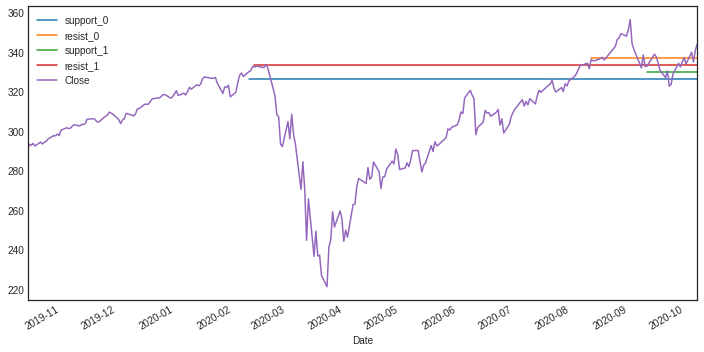

In [ ]:
extractDist(daily_candle,daily_candle.index[-1],2).iloc[-250:].plot(figsize=(12,6))

In [ ]:
# Filter out setups and triggers to test

# Setup defined as trading outside of the 20d 2sd bollinger bands
upper, mid, lower = talib.BBANDS(daily_candle['Close'],nbdevup=2,nbdevdn=2,timeperiod=20)
bband_df = pd.DataFrame({'Close':daily_candle['Close'],'upper':upper,'mid':mid,'lower':lower})
dips = bband_df[bband_df['Close'] < bband_df['lower']].copy()
spikes = bband_df[bband_df['Close'] > bband_df['upper']].copy()

# Other price and volume related features
band_width = (bband_df['upper'] - bband_df['lower']) / bband_df['Close']
band_width_z = (band_width - band_width.rolling(66).mean()) / band_width.rolling(66).std()
mfi = talib.MFI(daily_candle['High'],daily_candle['Low'],daily_candle['Close'],daily_candle['Volume'],timeperiod=14)
volume_mult = daily_candle['Volume'] / daily_candle['Volume'].rolling(20).mean()

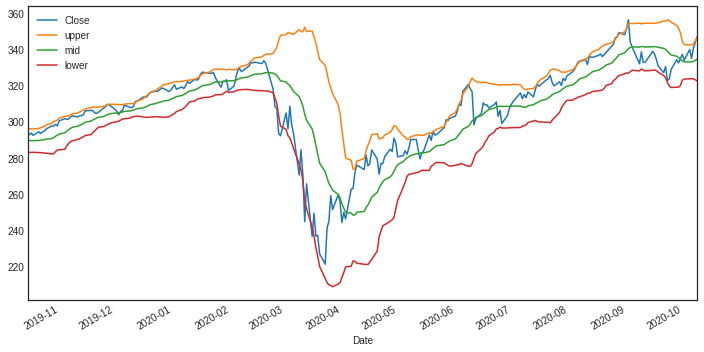

In [ ]:
bband_df[['Close','upper','mid','lower']].iloc[-250:].plot(figsize=(12,6))

In [ ]:
# Spike and Dip study
dip_levels = pd.concat([extractDist(daily_candle,d,3).tail(1) for d in dips[dips.index.year >= 2010].index])
spike_levels = pd.concat([extractDist(daily_candle,d,3).tail(1) for d in spikes[spikes.index.year >= 2010].index])

In [ ]:
dip_levels['sigma'] = daily_candle['Close'].pct_change().rolling(20).std()
dip_dist = -(dip_levels.div(dip_levels['Close'],axis=0) - 1)
dip_dist_feats = dip_dist.div(dip_levels.sigma,axis=0).drop(['Close','sigma'],axis=1)

feat_matrix = dip_dist_feats.copy()
feat_matrix['bandwidth'] = band_width_z
feat_matrix['mfi'] = mfi
feat_matrix['volume'] = volume_mult

feat_matrix['fwd_ret'] = daily_candle.Close.shift(-2) / daily_candle.Open.shift(-1) - 1
feat_matrix['ret_flag'] = np.where(feat_matrix.fwd_ret > 0, 1, -1)

In [ ]:
dip_dist_feats

,support_0,resist_0,support_1,resist_1,support_2,resist_2
Date,,,,,,
2010-01-21,-3.254832,0.115137,-3.121877,-2.087294,-2.816037,-1.560906
2010-01-22,-0.784803,-2.211738,-0.678783,-2.027187,-5.197143,-1.916056
2010-01-25,-0.261095,-0.568977,-0.156430,-1.669788,-4.617029,-1.487596
2010-01-28,-1.341983,0.064234,-1.238847,0.215613,0.450937,-1.645369
2010-05-03,0.967013,0.653089,0.969407,0.961191,1.304304,0.855058
...,...,...,...,...,...,...
2020-02-26,0.060053,-3.156008,-2.857283,-2.688080,-2.258799,-0.583297
2020-02-27,-2.941543,-0.166423,-0.580148,-1.923555,-1.725867,-2.922101
2020-03-06,0.541918,-0.124012,0.650297,0.703912,-1.215867,0.991109


In [ ]:
feat_matrix

,support_0,resist_0,support_1,resist_1,support_2,resist_2,bandwidth,mfi,volume,fwd_ret,ret_flag
Date,,,,,,,,,,,
2010-01-21,-3.254832,0.115137,-3.121877,-2.087294,-2.816037,-1.560906,-0.774063,52.794562,2.574694,-0.017062,-1
2010-01-22,-0.784803,-2.211738,-0.678783,-2.027187,-5.197143,-1.916056,-0.269582,47.606910,2.312421,-0.009112,-1
2010-01-25,-0.261095,-0.568977,-0.156430,-1.669788,-4.617029,-1.487596,0.001420,41.692935,1.225938,0.004416,1
2010-01-28,-1.341983,0.064234,-1.238847,0.215613,0.450937,-1.645369,0.940548,23.381781,1.721863,-0.003419,-1
2010-05-03,0.967013,0.653089,0.969407,0.961191,1.304304,0.855058,-1.538561,46.048161,0.965054,-0.021267,-1
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-26,0.060053,-3.156008,-2.857283,-2.688080,-2.258799,-0.583297,4.308022,25.911303,2.208892,-0.030481,-1
2020-02-27,-2.941543,-0.166423,-0.580148,-1.923555,-1.725867,-2.922101,5.386013,18.854932,2.745172,0.071029,1
2020-03-06,0.541918,-0.124012,0.650297,0.703912,-1.215867,0.991109,3.418339,17.774061,1.461218,0.047599,1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,ret
count,47.000000
mean,0.004949
std,0.015615
min,-0.051566
25%,-0.003614
50%,0.005628
75%,0.016081
max,0.032794


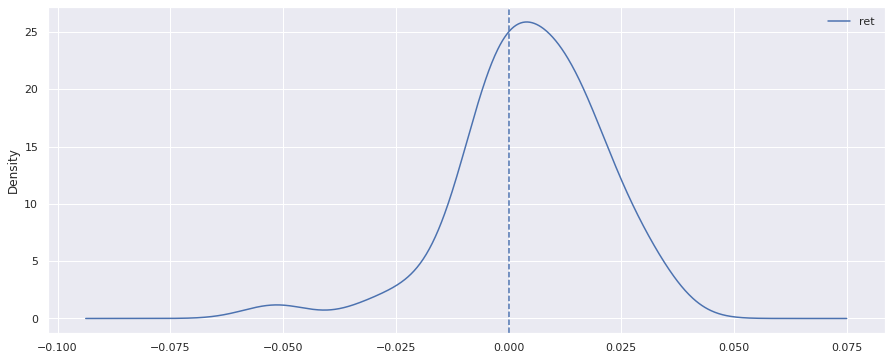

In [ ]:
feat_matrix2 = feat_matrix.copy()
select_feats = feat_matrix2.drop(['fwd_ret','ret_flag'],axis=1).columns
X = feat_matrix2[select_feats]
y = feat_matrix2[['ret_flag']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

model = logit.fit(X_train,y_train)
test_results = pd.DataFrame(model.predict(X_test),X_test.index,columns=['position'])
test_results['ret'] = feat_matrix2['fwd_ret'] * test_results['position']
test_results[['ret']].plot(kind='kde')
plt.axvline(x=0,linestyle='--')
test_results[['ret']].describe()

Feature: support_0, Score: -0.27062
Feature: resist_0, Score: 0.06021
Feature: support_1, Score: 0.03479
Feature: resist_1, Score: -0.01290
Feature: support_2, Score: -0.00023
Feature: resist_2, Score: 0.01429
Feature: bandwidth, Score: 0.14790
Feature: mfi, Score: -0.01898
Feature: volume, Score: -0.20650


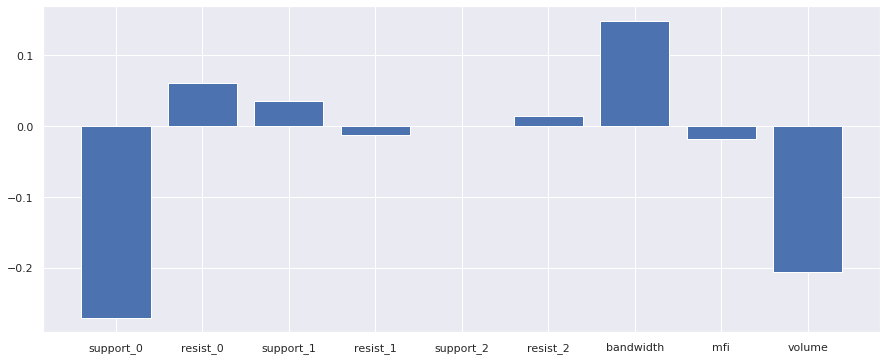

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X.columns[i],v))
 # plot feature importance
plt.bar([X.columns[x] for x in range(len(importance))], importance)
plt.show()

# AutoML


## Auto-Sklearn
GitHub: https://github.com/automl/auto-sklearn

In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import autosklearn.classification

# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(X_train, y_train)

# evaluate
y_hat = automl.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Test Accuracy score {0}".format(test_acc))

[WARNING] [2020-11-07 16:52:55,702:EnsembleBuilder(1):9d5a7c2e2fa0d19aaa5d7d0187508905] No models better than random - using Dummy Score!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2020-11-07 16:52:57,731:EnsembleBuilder(1):9d5a7c2e2fa0d19aaa5d7d0187508905] No models better than random - using Dummy Score!Number of models besides current dummy model: 5. Number of dummy models: 1
[WARNING] [2020-11-07 16:52:59,746:EnsembleBuilder(1):9d5a7c2e2fa0d19aaa5d7d0187508905] No models better than random - using Dummy Score!Number of models besides current dummy model: 7. Number of dummy models: 1
[WARNING] [2020-11-07 16:53:01,764:EnsembleBuilder(1):9d5a7c2e2fa0d19aaa5d7d0187508905] No models better than random - using Dummy Score!Number of models besides current dummy model: 11. Number of dummy models: 1
[WARNING] [2020-11-07 16:53:03,783:EnsembleBuilder(1):9d5a7c2e2fa0d19aaa5d7d0187508905] No models better than random - using Dummy Score!Number of mode

In [ ]:
test_results2 = pd.DataFrame(y_hat,X_test.index,columns=['position'])
test_results2['ret'] = feat_matrix['fwd_ret'] * test_results2['position']
#test_results2[['ret']].plot(kind='kde')
#plt.axvline(x=0,linestyle='--')
test_results2[['ret']].describe()

,ret
count,47.000000
mean,0.004129
std,0.015857
min,-0.051566
25%,-0.004166
50%,0.004351
75%,0.014369
max,0.032794


In [ ]:
import plotly.figure_factory as ff

fig2 = ff.create_distplot([test_results2['ret']], ['autosklearn pnl'], bin_size=.002)
fig2.show()

In [ ]:
import PipelineProfiler
profiler_data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.

## TPOT
GitHub: https://epistasislab.github.io/tpot/

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from deap import creator
from sklearn.model_selection import cross_val_score

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Generation 1 - Current best internal CV score: 0.7368421052631579

Generation 2 - Current best internal CV score: 0.7368421052631579

Generation 3 - Current best internal CV score: 0.7473684210526316

Generation 4 - Current best internal CV score: 0.7473684210526316

Generation 5 - Current best internal CV score: 0.7473684210526316

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=1, min_samples_split=12, n_estimators=100)
0.6595744680851063


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tpot.evaluated_individuals_.items()
print(dict(list(tpot.evaluated_individuals_.items())[0:2]))
# print a pipeline and its values
pipeline_str = list(tpot.evaluated_individuals_.keys())[0]
print(pipeline_str)
print(tpot.evaluated_individuals_[pipeline_str])
# convert pipeline string to scikit-learn pipeline object
optimized_pipeline = creator.Individual.from_string(pipeline_str, tpot._pset) # deap object
fitted_pipeline = tpot._toolbox.compile(expr=optimized_pipeline ) # scikit-learn pipeline object
# print scikit-learn pipeline object
print(fitted_pipeline)
# Fix random state when the operator allows  (optional) just for get consistent CV score 
#tpot.set_params(fitted_pipeline.steps)
# CV scores from scikit-learn
scores = cross_val_score(fitted_pipeline, X_train, y_train, cv=5, scoring='accuracy', verbose=0)
print(np.mean(scores))
#print(tpot.evaluated_individuals_[pipeline_str][1])

{'GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.1, GradientBoostingClassifier__min_samples_leaf=17, GradientBoostingClassifier__min_samples_split=15, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.25)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': 0.7368421052631579}, 'XGBClassifier(GaussianNB(input_matrix), XGBClassifier__learning_rate=1.0, XGBClassifier__max_depth=6, XGBClassifier__min_child_weight=4, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.7500000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': 0.6}}
GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoo

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:


0.7368421052631579


In [ ]:
test_results3 = pd.DataFrame(tpot.predict(X_test),X_test.index,columns=['position'])
test_results3['ret'] = feat_matrix['fwd_ret'] * test_results3['position']
#test_results3[['ret']].plot(kind='kde')
#plt.axvline(x=0,linestyle='--')
test_results3[['ret']].describe()

,ret
count,47.000000
mean,0.004473
std,0.015761
min,-0.051566
25%,-0.003614
50%,0.004776
75%,0.014369
max,0.032794


In [ ]:
fig3 = ff.create_distplot([test_results3['ret']], ['TPOT pnl'], bin_size=.002)
fig3.show()

## H2O
https://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/downloading.html?spm=a2c65.11461447.0.0.68b37903ykpPUB

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

feat_matrix2 = feat_matrix.copy()

feats = h2o.H2OFrame(feat_matrix2.drop(['fwd_ret'],axis=1).reset_index())
# split into train and validation sets
train, test = feats.split_frame(ratios = [.67], seed = 42)

# Identify predictors and response
x = train.columns
y = "ret_flag"
x.remove(y)
x.remove('Date')

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 44 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_gu0w18
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.064 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |█████████
17:14:56.971: Skipping training of model GBM_5_AutoML_20201107_171446 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20201107_171446.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 97.0.


███████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_20201107_171446,0.649735,0.571187,0.416352,0.379894,0.439336,0.193016
GBM_1_AutoML_20201107_171446,0.636508,0.735846,0.37148,0.37381,0.478256,0.228728
GBM_grid__1_AutoML_20201107_171446_model_2,0.628571,0.579117,0.335049,0.365608,0.444,0.197136
XGBoost_3_AutoML_20201107_171446,0.626455,0.61943,0.3419,0.34418,0.463832,0.21514
XGBoost_grid__1_AutoML_20201107_171446_model_3,0.624339,0.588386,0.349932,0.351323,0.448315,0.200986
XGBoost_grid__1_AutoML_20201107_171446_model_2,0.610847,0.587625,0.308501,0.345503,0.449996,0.202496
XGBoost_grid__1_AutoML_20201107_171446_model_5,0.600529,0.607102,0.375042,0.408466,0.453764,0.205901
GBM_2_AutoML_20201107_171446,0.597884,0.630863,0.354837,0.398413,0.461924,0.213373
StackedEnsemble_AllModels_AutoML_20201107_171446,0.597354,0.583028,0.332096,0.39709,0.445088,0.198104
GBM_grid__1_AutoML_20201107_171446_model_1,0.596825,0.609751,0.303936,0.351058,0.45711,0.20895


In [ ]:
preds = aml.predict(test)
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

drf prediction progress: |████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
DRF_1_AutoML_20201107_171446,0.649735,0.571187,0.416352,0.379894,0.439336,0.193016,78,0.091529
GBM_1_AutoML_20201107_171446,0.636508,0.735846,0.37148,0.37381,0.478256,0.228728,119,0.046587
GBM_grid__1_AutoML_20201107_171446_model_2,0.628571,0.579117,0.335049,0.365608,0.444,0.197136,47,0.037604
XGBoost_3_AutoML_20201107_171446,0.626455,0.61943,0.3419,0.34418,0.463832,0.21514,74,0.033544
XGBoost_grid__1_AutoML_20201107_171446_model_3,0.624339,0.588386,0.349932,0.351323,0.448315,0.200986,56,0.034045
XGBoost_grid__1_AutoML_20201107_171446_model_2,0.610847,0.587625,0.308501,0.345503,0.449996,0.202496,60,0.032609
XGBoost_grid__1_AutoML_20201107_171446_model_5,0.600529,0.607102,0.375042,0.408466,0.453764,0.205901,331,0.034186
GBM_2_AutoML_20201107_171446,0.597884,0.630863,0.354837,0.398413,0.461924,0.213373,62,0.037118
StackedEnsemble_AllModels_AutoML_20201107_171446,0.597354,0.583028,0.332096,0.39709,0.445088,0.198104,226,0.139082
GBM_grid__1_AutoML_20201107_171446_model_1,0.596825,0.609751,0.303936,0.351058,0.45711,0.20895,44,0.067201


In [ ]:
test_results4 = pd.DataFrame(preds.as_data_frame()['predict'].to_numpy(),pd.to_datetime(test.as_data_frame()['Date'], unit='ms'),columns=['position'])
test_results4['ret'] = feat_matrix['fwd_ret'] * test_results4['position']
#test_results4[['ret']].plot(kind='kde')
#plt.axvline(x=0,linestyle='--')
test_results4[['ret']].describe()

,ret
count,45.000000
mean,-0.005135
std,0.023518
min,-0.080608
25%,-0.015711
50%,-0.003205
75%,0.008097
max,0.051566


In [ ]:
fig4 = ff.create_distplot([test_results3['ret']], ['H2O pnl'], bin_size=.002)
fig4.show()

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
best_auprc_model = h2o.get_model(model_ids[0])
best_auprc_model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.2349257857099934
RMSE: 0.4846914335017624
LogLoss: 0.6846619767510661
Mean Per-Class Error: 0.33333333333333337
AUC: 0.6133333333333333
AUCPR: 0.3946974174386723
Gini: 0.22666666666666657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3023255813953488: 


,,-1,1,Error,Rate
0,-1,22.0,8.0,0.2667,(8.0/30.0)
1,1,6.0,9.0,0.4,(6.0/15.0)
2,Total,28.0,17.0,0.3111,(14.0/45.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.302326,0.562500,8.0
1,max f2,0.046512,0.742574,18.0
2,max f0point5,0.302326,0.542169,8.0
3,max accuracy,0.302326,0.688889,8.0
4,max precision,0.302326,0.529412,8.0
5,max recall,0.046512,1.000000,18.0
6,max specificity,0.790698,0.966667,0.0
7,max absolute_mcc,0.302326,0.324102,8.0
8,max min_per_class_accuracy,0.302326,0.600000,8.0
9,max mean_per_class_accuracy,0.302326,0.666667,8.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 26.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022222,0.708837,0.00,0.000000,0.000000,0.790698,0.000000,0.790698,0.000000,0.000000,-100.0,-100.000000,-0.033333
1,2,0.022222,0.626977,0.00,0.000000,0.000000,0.000000,0.000000,0.790698,0.000000,0.000000,-100.0,-100.000000,-0.033333
2,3,0.066667,0.604651,1.50,1.000000,0.500000,0.604651,0.333333,0.666667,0.066667,0.066667,50.0,0.000000,0.000000
3,4,0.066667,0.595349,0.00,1.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.066667,-100.0,0.000000,0.000000
4,5,0.111111,0.548837,1.50,1.200000,0.500000,0.558140,0.400000,0.623256,0.066667,0.133333,50.0,20.000000,0.033333
5,6,0.155556,0.413953,1.50,1.285714,0.500000,0.488372,0.428571,0.584718,0.066667,0.200000,50.0,28.571429,0.066667
6,7,0.244444,0.395349,0.75,1.090909,0.250000,0.395349,0.363636,0.515856,0.066667,0.266667,-25.0,9.090909,0.033333
7,8,0.311111,0.320930,2.00,1.285714,0.666667,0.341085,0.428571,0.478405,0.133333,0.400000,100.0,28.571429,0.133333
8,9,0.444444,0.279070,1.50,1.350000,0.500000,0.290698,0.450000,0.422093,0.200000,0.600000,50.0,35.000000,0.233333
9,10,0.533333,0.232558,0.75,1.250000,0.250000,0.244186,0.416667,0.392442,0.066667,0.666667,-25.0,25.000000,0.200000


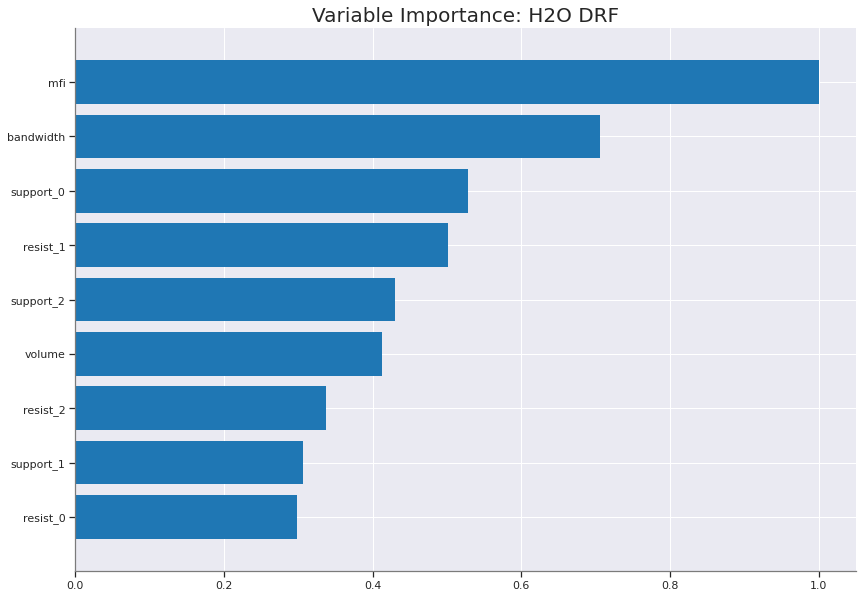

In [ ]:
best_auprc_model.varimp_plot()